# **Linear Mixed Models:**

In [1]:
import os
os.environ["R_HOME"] = r"C:\Program Files\R\R-4.5.0"  

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

import seaborn as sns
import numpy as np
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import IntVector


pandas2ri.activate()


base = importr('base')
depmixS4 = importr("depmixS4")
r('set.seed(2030)')
np.random.seed(2030)

from pymer4.models import Lmer

In [2]:
import os
os.environ["PYTHONIOENCODING"] = "utf-8"
os.environ["LC_ALL"] = "en_US.UTF-8"
os.environ["LANG"] = "en_US.UTF-8"


In [3]:
r('options(encoding = "UTF-8")')
r('Sys.setlocale("LC_ALL", "en_US.UTF-8")')


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In Sys.setlocale("LC_ALL", "en_US.UTF-8") :
R[write to console]: 
 
R[write to console]:  using locale code page other than 1252 may cause problems



array(['LC_COLLATE=en_US.UTF-8;LC_CTYPE=en_US.UTF-8;LC_MONETARY=en_US.UTF-8;LC_NUMERIC=C;LC_TIME=en_US.UTF-8'],
      dtype='<U100')

In [4]:
lmm_data=pd.read_csv('../data/raw/lmm_data.csv')


In [5]:
lmm_data.head()

,Commune,Original_Day,Correlative_Day,Transition,Probability_Transition,Days,Internal_Mobility_Index,External_Mobility_Index,Cumulative_Cases_Rate,Gross_Daily_Cases,Gross_Daily_Cases_Mobile_Average_7_Days,Per_Capita_Income,Average_Household_Persons,Inmigrants,Total_Households_Housed,Housing_Precariousness_Index,Higher_Education_Percentage,Social_Priority_Index_2020
0,Cerrillos,2020-04-02,0,Trans_1->1,0.992268,2020-04-02,1.970381,7.804008,2.248303,2.248303,2.248303,267197.56,3.145581,3606,68120,3.395792,11.9,67.81
1,Cerrillos,2020-04-03,1,Trans_1->1,0.991126,2020-04-03,1.845790,7.471452,4.496605,2.248303,2.248303,267197.56,3.145581,3606,68120,3.395792,11.9,67.81
2,Cerrillos,2020-04-04,2,Trans_1->1,0.989853,2020-04-04,1.678598,6.891732,4.496605,0.000000,1.498868,267197.56,3.145581,3606,68120,3.395792,11.9,67.81
3,Cerrillos,2020-04-05,3,Trans_1->1,0.984629,2020-04-05,1.736766,8.317872,4.496605,0.000000,1.124151,267197.56,3.145581,3606,68120,3.395792,11.9,67.81
4,Cerrillos,2020-04-06,4,Trans_1->1,0.982625,2020-04-06,1.331296,6.378498,4.496605,0.000000,0.899321,267197.56,3.145581,3606,68120,3.395792,11.9,67.81


## **Transitions**:

### **Model A**
$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + (\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} \mid \text{Commune})
$$

#### Transition 1->2 (Moderate to Severe):

In [6]:
specific_transition_1_2 = 'Trans_1->2'
transition_data_1_2 = lmm_data[lmm_data['Transition'] == specific_transition_1_2]


In [7]:
transition_data_1_2['Commune'] = transition_data_1_2['Commune'].astype('category')


C:\Users\ferna\AppData\Local\Temp\ipykernel_5708\1635946703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_1_2['Commune'] = transition_data_1_2['Commune'].astype('category')


In [8]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_1_2)
r.assign("transition_data_1_2", r_data)

Commune,Original_Day,Correlative_Day,...,Housing_Precariousness_Index,Higher_Education_Percentage,Social_Priority_Index_2020
Cerri...,...,0,...,...,...,...
Cerri...,,1,,,,
Cerri...,,2,,,,
Cerri...,,3,,,,
...,,...,,,,
Vitac...,,7272,,,,
Vitac...,,7273,,,,
Vitac...,,7274,,,,
Vitac...,,7275,,,,


In [9]:
r('''
# Fit the model
library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_mov_1_2 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + (Internal_Mobility_Index + External_Mobility_Index | Commune), data = transition_data_1_2, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_mov_1_2))
writeLines(summary_text)
''')


R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: 'lme4'


R[write to console]: The following object is masked from 'package:nlme':

    lmList




Linear mixed model fit by REML ['lmerMod']
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_1_2
Control: control

REML criterion at convergence: -12292.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6575 -0.5798 -0.0798  0.4670  5.5393 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.101357 0.31837             
          Internal_Mobility_Index 0.007213 0.08493  -0.46      
          External_Mobility_Index 0.006732 0.08205  -0.44 -0.45
 Residual                         0.010097 0.10049             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                        Estimate Std. Error t value
(Intercept)             -0.56914    0.05507 -10.335
Internal_Mobility_Index  0.05111    0.01533   3.334
External_Mobility_Index  0.08422    0.01440   5.851

Correlati

In [10]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_mov_1_2, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Commune
Cerrillos,0.172851,0.022602,-0.044716,Cerrillos
Cerro Navia,0.427945,-0.054062,-0.061213,Cerro Navia
Conchali,0.251372,-0.027316,-0.030421,Conchali
El Bosque,0.087040,-0.017365,0.030611,El Bosque
Estacion Central,-0.474498,0.109837,0.029388,Estacion Central


In [11]:
#  Save Random Effects to CSV
r('''
output_path <- "../data/processed/random_slopes_1_2_model_A.csv"
write.csv(ranef_df, output_path, row.names = FALSE)
''')

In [12]:
#  Visualize with Caterpillar Plot (in R)
plot_path = "../results/figures/random_slope/random_slope_1_2_model_A_external_mobility_index.png"

r(f'''
# Ordenar datos
external_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
external_df$Commune <- factor(external_df$Commune, levels = external_df$Commune)

# Crear el plot y guardarlo
library(ggplot2)
p <- ggplot(external_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(title = "Random Slope per Commune: External Mobility Index",
       y = "Random Slope Estimate",
       x = "Commune") +
  theme_minimal(base_size = 13)

# Guardar como PNG
png("{plot_path}", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


1


In [ ]:
#  Visualize with Caterpillar Plot (in R)
plot_path = "../results/figures/random_slope/random_slope_1_2_model_A_internal_mobility_index.png"

r(f'''
# Ordenar datos
external_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
external_df$Commune <- factor(external_df$Commune, levels = external_df$Commune)

# Crear el plot y guardarlo
library(ggplot2)
p <- ggplot(external_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(title = "Random Slope per Commune: External Mobility Index",
       y = "Random Slope Estimate",
       x = "Commune") +
  theme_minimal(base_size = 13)

# Guardar como PNG
png("{plot_path}", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

#### Transition 1->3 (Moderate to Critical):

In [13]:
specific_transition_1_3 = 'Trans_1->3'
transition_data_1_3 = lmm_data[lmm_data['Transition'] == specific_transition_1_3]


In [14]:
transition_data_1_3['Commune'] = transition_data_1_3['Commune'].astype('category')


C:\Users\ferna\AppData\Local\Temp\ipykernel_5708\4093250348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_1_3['Commune'] = transition_data_1_3['Commune'].astype('category')


In [15]:
pandas2ri.activate()

r_data = pandas2ri.py2rpy(transition_data_1_3)
r.assign("transition_data_1_3", r_data)

Commune,Original_Day,Correlative_Day,...,Housing_Precariousness_Index,Higher_Education_Percentage,Social_Priority_Index_2020
Cerri...,...,0,...,...,...,...
Cerri...,,1,,,,
Cerri...,,2,,,,
Cerri...,,3,,,,
...,,...,,,,
Vitac...,,7272,,,,
Vitac...,,7273,,,,
Vitac...,,7274,,,,
Vitac...,,7275,,,,


In [16]:
r('''
# Fit the model

control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_mov_1_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + (Internal_Mobility_Index + External_Mobility_Index | Commune), data = transition_data_1_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_mov_1_3))
writeLines(summary_text)
''')


Linear mixed model fit by REML ['lmerMod']
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_1_3
Control: control

REML criterion at convergence: -13947.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6563 -0.0193 -0.0009  0.0128  9.3703 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.136538 0.36951             
          Internal_Mobility_Index 0.008789 0.09375  -0.80      
          External_Mobility_Index 0.004681 0.06842   0.15 -0.67
 Residual                         0.008062 0.08979             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                         Estimate Std. Error t value
(Intercept)             -0.222177   0.063674  -3.489
Internal_Mobility_Index  0.050069   0.016530   3.029
External_Mobility_Index -0.005753   0.012018  -0.479

Corre

In [17]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_mov_1_3, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Commune
Cerrillos,0.222738,-0.048627,0.005298,Cerrillos
Cerro Navia,0.223502,-0.047407,0.004800,Cerro Navia
Conchali,0.183761,-0.046799,0.011832,Conchali
El Bosque,0.219199,-0.045763,0.004855,El Bosque
Estacion Central,-0.377166,0.084386,0.042533,Estacion Central


In [18]:
#  Save Random Effects to CSV
r('''
output_path <- "../data/processed/random_slopes_1_3_model_A.csv"
write.csv(ranef_df, output_path, row.names = FALSE)
''')

In [19]:
#  Visualize with Caterpillar Plot (in R)
plot_path = "../results/figures/random_slope/random_slope_1_3_model_A_external_mobility_index.png"

r(f'''
# Ordenar datos
external_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
external_df$Commune <- factor(external_df$Commune, levels = external_df$Commune)

# Crear el plot y guardarlo
library(ggplot2)
p <- ggplot(external_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(title = "Random Slope per Commune: External Mobility Index",
       y = "Random Slope Estimate",
       x = "Commune") +
  theme_minimal(base_size = 13)

# Guardar como PNG
png("{plot_path}", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


1


In [ ]:
#  Visualize with Caterpillar Plot (in R)
plot_path = "../results/figures/random_slope/random_slope_1_3_model_A_internal_mobility_index.png"

r(f'''
# Ordenar datos
external_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
external_df$Commune <- factor(external_df$Commune, levels = external_df$Commune)

# Crear el plot y guardarlo
library(ggplot2)
p <- ggplot(external_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(title = "Random Slope per Commune: External Mobility Index",
       y = "Random Slope Estimate",
       x = "Commune") +
  theme_minimal(base_size = 13)

# Guardar como PNG
png("{plot_path}", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')

#### Transition 2->3 (Severe to Critical):

In [20]:
specific_transition_2_3 = 'Trans_2->3'
transition_data_2_3 = lmm_data[lmm_data['Transition'] == specific_transition_2_3]


In [21]:
transition_data_2_3['Commune'] = transition_data_2_3['Commune'].astype('category')


C:\Users\ferna\AppData\Local\Temp\ipykernel_5708\2940721469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_2_3['Commune'] = transition_data_2_3['Commune'].astype('category')


In [22]:
pandas2ri.activate()

r_data = pandas2ri.py2rpy(transition_data_2_3)
r.assign("transition_data_2_3", r_data)

Commune,Original_Day,Correlative_Day,...,Housing_Precariousness_Index,Higher_Education_Percentage,Social_Priority_Index_2020
Cerri...,...,0,...,...,...,...
Cerri...,,1,,,,
Cerri...,,2,,,,
Cerri...,,3,,,,
...,,...,,,,
Vitac...,,7272,,,,
Vitac...,,7273,,,,
Vitac...,,7274,,,,
Vitac...,,7275,,,,


In [23]:
r('''
# Fit the model

control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_mov_2_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + (Internal_Mobility_Index + External_Mobility_Index | Commune), data = transition_data_2_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_mov_2_3))
writeLines(summary_text)
''')


Linear mixed model fit by REML ['lmerMod']
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_2_3
Control: control

REML criterion at convergence: -3779.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.4919 -0.6307 -0.1649  0.5433  4.3073 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.24022  0.4901              
          Internal_Mobility_Index 0.02989  0.1729   -0.69      
          External_Mobility_Index 0.01054  0.1027    0.19 -0.70
 Residual                         0.03268  0.1808              
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                        Estimate Std. Error t value
(Intercept)             -0.70281    0.08503  -8.266
Internal_Mobility_Index  0.05885    0.03086   1.907
External_Mobility_Index  0.15286    0.01839   8.312

Correlatio

In [24]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_mov_2_3, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Commune
Cerrillos,0.027682,0.132923,-0.100383,Cerrillos
Cerro Navia,-0.423736,-0.015056,0.019017,Cerro Navia
Conchali,-0.375921,0.129443,-0.016299,Conchali
El Bosque,0.190409,0.023473,-0.050493,El Bosque
Estacion Central,0.236555,-0.046160,-0.050748,Estacion Central


In [25]:
#  Save Random Effects to CSV
r('''
output_path <- "../data/processed/random_slopes_2_3_model_A.csv"
write.csv(ranef_df, output_path, row.names = FALSE)
''')

In [26]:
#  Visualize with Caterpillar Plot (in R)
plot_path = "../results/figures/random_slope/random_slope_2_3_model_A_external_mobility_index.png"

r(f'''
# Ordenar datos
external_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
external_df$Commune <- factor(external_df$Commune, levels = external_df$Commune)

# Crear el plot y guardarlo
library(ggplot2)
p <- ggplot(external_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(title = "Random Slope per Commune: External Mobility Index",
       y = "Random Slope Estimate",
       x = "Commune") +
  theme_minimal(base_size = 13)

# Guardar como PNG
png("{plot_path}", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


1


In [ ]:
#  Visualize with Caterpillar Plot (in R)
plot_path = "../results/figures/random_slope/random_slope_2_3_model_A_internal_mobility_index.png"

r(f'''
# Ordenar datos
external_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
external_df$Commune <- factor(external_df$Commune, levels = external_df$Commune)

# Crear el plot y guardarlo
library(ggplot2)
p <- ggplot(external_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(title = "Random Slope per Commune: External Mobility Index",
       y = "Random Slope Estimate",
       x = "Commune") +
  theme_minimal(base_size = 13)

# Guardar como PNG
png("{plot_path}", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


#### Transition 3->3 (Keeping in Critical State):

In [27]:
specific_transition_3_3 = 'Trans_3->3'
transition_data_3_3 = lmm_data[lmm_data['Transition'] == specific_transition_3_3]


In [28]:
transition_data_3_3['Commune'] = transition_data_3_3['Commune'].astype('category')


C:\Users\ferna\AppData\Local\Temp\ipykernel_5708\3895817056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_3_3['Commune'] = transition_data_3_3['Commune'].astype('category')


In [29]:
pandas2ri.activate()

r_data = pandas2ri.py2rpy(transition_data_3_3)
r.assign("transition_data_3_3", r_data)

Commune,Original_Day,Correlative_Day,...,Housing_Precariousness_Index,Higher_Education_Percentage,Social_Priority_Index_2020
Cerri...,...,0,...,...,...,...
Cerri...,,1,,,,
Cerri...,,2,,,,
Cerri...,,3,,,,
...,,...,,,,
Vitac...,,7272,,,,
Vitac...,,7273,,,,
Vitac...,,7274,,,,
Vitac...,,7275,,,,


In [30]:
r('''
# Fit the model

control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_mov_3_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + (Internal_Mobility_Index + External_Mobility_Index | Commune), data = transition_data_3_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_mov_3_3))
writeLines(summary_text)
''')


Linear mixed model fit by REML ['lmerMod']
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_3_3
Control: control

REML criterion at convergence: -7463.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5962 -0.7123  0.1524  0.7844  3.0789 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.087044 0.29503             
          Internal_Mobility_Index 0.015317 0.12376  -0.50      
          External_Mobility_Index 0.006197 0.07872  -0.16 -0.61
 Residual                         0.019726 0.14045             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                        Estimate Std. Error t value
(Intercept)              1.92858    0.05156  37.404
Internal_Mobility_Index -0.11047    0.02225  -4.966
External_Mobility_Index -0.14673    0.01410 -10.410

Correlatio

In [31]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_mov_3_3, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Commune
Cerrillos,-0.251203,-0.081652,0.094100,Cerrillos
Cerro Navia,0.202739,0.068988,-0.026483,Cerro Navia
Conchali,0.188230,-0.080444,0.003817,Conchali
El Bosque,-0.410095,0.027640,0.043256,El Bosque
Estacion Central,0.157304,-0.076538,0.025535,Estacion Central


In [32]:
#  Save Random Effects to CSV
r('''
output_path <- "../data/processed/random_slopes_3_3_model_A.csv"
write.csv(ranef_df, output_path, row.names = FALSE)
''')

In [33]:
#  Visualize with Caterpillar Plot (in R)
plot_path = "../results/figures/random_slope/random_slope_3_3_model_A_external_mobility_index.png"

r(f'''
# Ordenar datos
external_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
external_df$Commune <- factor(external_df$Commune, levels = external_df$Commune)

# Crear el plot y guardarlo
library(ggplot2)
p <- ggplot(external_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(title = "Random Slope per Commune: External Mobility Index",
       y = "Random Slope Estimate",
       x = "Commune") +
  theme_minimal(base_size = 13)

# Guardar como PNG
png("{plot_path}", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


1


In [ ]:
#  Visualize with Caterpillar Plot (in R)
plot_path = "../results/figures/random_slope/random_slope_3_3_model_A_internal_mobility_index.png"

r(f'''
# Ordenar datos
external_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
external_df$Commune <- factor(external_df$Commune, levels = external_df$Commune)

# Crear el plot y guardarlo
library(ggplot2)
p <- ggplot(external_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(title = "Random Slope per Commune: External Mobility Index",
       y = "Random Slope Estimate",
       x = "Commune") +
  theme_minimal(base_size = 13)

# Guardar como PNG
png("{plot_path}", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


___________

### **Elastic Net Analysis (Ridge & Lasso)**

Elastic Net RMSE: 22.82015959101418

Coefficients:
                       Variable  Elastic Net Coef
0       Internal_Mobility_Index         -5.135855
1       External_Mobility_Index         -6.394446
2             Per_Capita_Income          1.890084
3     Average_Household_Persons         -0.348834
4                    Inmigrants         -0.529592
5       Total_Households_Housed         -2.840278
6  Housing_Precariousness_Index          2.316444
7   Higher_Education_Percentage         -2.526985


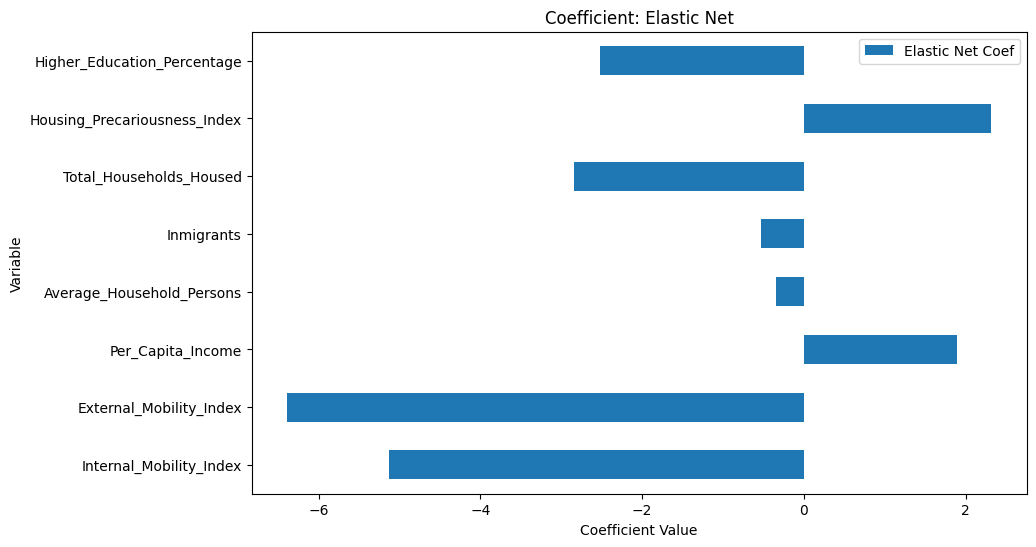

In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define las columnas de covariables y la variable objetivo
covariables = ['Internal_Mobility_Index','External_Mobility_Index','Per_Capita_Income', 'Average_Household_Persons',
               'Inmigrants', 'Total_Households_Housed', 'Housing_Precariousness_Index',
               'Higher_Education_Percentage']
target = 'Gross_Daily_Cases_Mobile_Average_7_Days'  # Sustituye por tu variable objetivo

# Dividir los datos en características (X) y objetivo (y)
X = lmm_data[covariables]
y = lmm_data[target]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ajustar modelo Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # Ajusta alpha y l1_ratio según sea necesario
elastic_net.fit(X_train, y_train)

# Coeficientes obtenidos
elastic_net_coef = elastic_net.coef_

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({
    'Variable': covariables,
    'Elastic Net Coef': elastic_net_coef
})

# Evaluar el modelo
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_rmse = np.sqrt(mean_squared_error(y_test, elastic_net_pred))

# Mostrar resultados
print("Elastic Net RMSE:", elastic_net_rmse)
print("\nCoefficients:")
print(coef_df)

# Visualización opcional
import matplotlib.pyplot as plt

coef_df.set_index('Variable').plot(kind='barh', figsize=(10, 6))
plt.title('Coefficient: Elastic Net')
plt.xlabel('Coefficient Value')
plt.grid(False)
plt.show()


___________

### **Model B**
$$
\text{Probability\_Transition} \sim \text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + \text{ElasticNet\_Variables} + (\text{Internal\_Mobility\_Index} + \text{External\_Mobility\_Index} + \text{ElasticNet\_Variables}\mid \text{Commune})
$$

#### Transition 1->2 (Moderate to Severe):

In [41]:
r('''
# Fit the model
transition_data_1_2$Internal_Mobility_Index <- scale(transition_data_1_2$Internal_Mobility_Index)
transition_data_1_2$External_Mobility_Index <- scale(transition_data_1_2$External_Mobility_Index)
transition_data_1_2$Per_Capita_Income <- scale(transition_data_1_2$Per_Capita_Income)
transition_data_1_2$Average_Household_Persons <- scale(transition_data_1_2$Average_Household_Persons)
transition_data_1_2$Inmigrants <- scale(transition_data_1_2$Inmigrants)
transition_data_1_2$Total_Households_Housed <- scale(transition_data_1_2$Total_Households_Housed)
transition_data_1_2$Housing_Precariousness_Index <- scale(transition_data_1_2$Housing_Precariousness_Index)
transition_data_1_2$Higher_Education_Percentage <- scale(transition_data_1_2$Higher_Education_Percentage)

library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_mov_1_2 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income + Average_Household_Persons + Inmigrants + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + (Internal_Mobility_Index + External_Mobility_Index  + Per_Capita_Income + Average_Household_Persons + Inmigrants + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune), data = transition_data_1_2, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_mov_1_2))
writeLines(summary_text)
''')


R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Average_Household_Persons + Inmigrants +  
    Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Average_Household_Persons +  
    Inmigrants + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage | Commune)
   Data: transition_data_1_2
Control: control

REML criterion at convergence: -12359.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8879 -0.5782 -0.0821  0.4612  5.5148 

Random effects:
 Groups   Name                         Variance Std.Dev. Corr             
 Commune  (Intercept)                  0.012340 0.11109                   
          Internal_Mobility_Index      0.033293 0.18246   0.70            
          External_Mobility_Index      0.0348

In [42]:
# Extract Random Effects
r('''
ranef_data <- ranef(model_mov_1_2, condVar = TRUE)$Commune
ranef_df <- as.data.frame(ranef_data)
ranef_df$Commune <- rownames(ranef_data)
''')

ranef_df = pandas2ri.rpy2py(r['ranef_df'])
ranef_df.head()

,(Intercept),Internal_Mobility_Index,External_Mobility_Index,Per_Capita_Income,Average_Household_Persons,Inmigrants,Total_Households_Housed,Housing_Precariousness_Index,Higher_Education_Percentage,Commune
Cerrillos,-0.033462,0.042885,-0.093972,0.081202,-0.015619,0.050638,-0.071659,-0.008119,-0.189956,Cerrillos
Cerro Navia,-0.137278,-0.109782,-0.131837,-0.348307,0.089260,0.187622,-0.096886,-0.034920,0.202665,Cerro Navia
Conchali,-0.070590,-0.060220,-0.060474,-0.168187,0.037768,0.092363,-0.039750,-0.019906,0.094300,Conchali
El Bosque,-0.007128,-0.045538,0.080209,0.145956,-0.106116,-0.043147,0.119658,-0.027138,-0.150151,El Bosque
Estacion Central,0.184609,0.223924,0.067177,0.437943,-0.052639,-0.205873,-0.002041,0.067971,-0.290734,Estacion Central


In [43]:
#  Save Random Effects to CSV
r('''
output_path <- "../data/processed/random_slopes_1_2_model_B.csv"
write.csv(ranef_df, output_path, row.names = FALSE)
''')

In [44]:
#  Visualize with Caterpillar Plot (in R)
plot_path = "../results/figures/random_slope/random_slope_1_2_model_B_external_mobility_index.png"

r(f'''
# Ordenar datos
external_df <- ranef_df[order(ranef_df$External_Mobility_Index), ]
external_df$Commune <- factor(external_df$Commune, levels = external_df$Commune)

# Crear el plot y guardarlo
library(ggplot2)
p <- ggplot(external_df, aes(x = Commune, y = External_Mobility_Index)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  coord_flip() +
  labs(title = "Random Slope per Commune: External Mobility Index",
       y = "Random Slope Estimate",
       x = "Commune") +
  theme_minimal(base_size = 13)

# Guardar como PNG
png("{plot_path}", width = 1000, height = 800, res = 150)
print(p)
dev.off()
''')


1
